In [1]:
from data.gen_data import build_X, build_Y, build_XY
from data.gen_data_config import gen_data_config
from evaluation import score
import pandas as pd
import numpy as np
from util import plot_roi, categori_reverse
from model import build_model
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
import keras

Using TensorFlow backend.


In [2]:
tr_s, tr_e = '2001/1/1', '2018/12/31'
te_s, te_e = '2019/1/1', '2019/12/31'
feature_days = 3

In [3]:
tr_x, tr_y, tr_result = build_XY(tr_s, tr_e, 
                                     gen_data_config['selected_features'], 
                                     feature_days)
te_x, te_y, te_result = build_XY(te_s, te_e, 
                                 gen_data_config['selected_features'], 
                                 feature_days)
# convert class vectors to binary class matrices
one_tr_y = keras.utils.to_categorical(tr_y, 3)
one_te_y = keras.utils.to_categorical(te_y, 3)

In [4]:
re_tr_x = np.reshape(tr_x, (-1, feature_days, len(gen_data_config['selected_features'])))
re_te_x = np.reshape(te_x, (-1, feature_days, len(gen_data_config['selected_features'])))
model_rnn = build_model('rnn' ,re_tr_x.shape, one_tr_y.shape)

''' Compile model with specified loss and optimizer '''
model_rnn.compile(loss= 'categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

''' set the size of mini-batch and number of epochs'''
batch_size = 128
epochs = 300

'''Fit models and use validation_split=0.1 '''
history = model_rnn.fit(re_tr_x, one_tr_y,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              shuffle=True,
                              validation_split=0.1,)

Train on 4010 samples, validate on 446 samples
Epoch 1/300
4010/4010 [==============================] - 2s 451us/step - loss: 1.1092 - accuracy: 0.3935 - val_loss: 1.0634 - val_accuracy: 0.5000
Epoch 2/300
4010/4010 [==============================] - 0s 106us/step - loss: 1.0391 - accuracy: 0.4835 - val_loss: 1.0477 - val_accuracy: 0.5000
Epoch 3/300
4010/4010 [==============================] - 0s 108us/step - loss: 1.0175 - accuracy: 0.5010 - val_loss: 1.0411 - val_accuracy: 0.5000
Epoch 4/300
4010/4010 [==============================] - 0s 104us/step - loss: 1.0073 - accuracy: 0.5095 - val_loss: 1.0386 - val_accuracy: 0.5000
Epoch 5/300
4010/4010 [==============================] - 0s 106us/step - loss: 0.9969 - accuracy: 0.5132 - val_loss: 1.0377 - val_accuracy: 0.5000
Epoch 6/300
4010/4010 [==============================] - 0s 105us/step - loss: 0.9872 - accuracy: 0.5237 - val_loss: 1.0387 - val_accuracy: 0.5000
Epoch 7/300
4010/4010 [==============================] - 0s 115us/step 

4010/4010 [==============================] - 0s 109us/step - loss: 0.5498 - accuracy: 0.7633 - val_loss: 1.8591 - val_accuracy: 0.3901
Epoch 57/300
4010/4010 [==============================] - 0s 108us/step - loss: 0.5343 - accuracy: 0.7726 - val_loss: 1.8297 - val_accuracy: 0.3655
Epoch 58/300
4010/4010 [==============================] - 0s 95us/step - loss: 0.5252 - accuracy: 0.7751 - val_loss: 1.8374 - val_accuracy: 0.3901
Epoch 59/300
4010/4010 [==============================] - 0s 91us/step - loss: 0.4905 - accuracy: 0.7943 - val_loss: 1.8072 - val_accuracy: 0.3991
Epoch 60/300
4010/4010 [==============================] - 0s 119us/step - loss: 0.4607 - accuracy: 0.8062 - val_loss: 1.8772 - val_accuracy: 0.3879
Epoch 61/300
4010/4010 [==============================] - 0s 107us/step - loss: 0.4556 - accuracy: 0.8112 - val_loss: 1.8651 - val_accuracy: 0.4126
Epoch 62/300
4010/4010 [==============================] - 0s 99us/step - loss: 0.4545 - accuracy: 0.8140 - val_loss: 2.0473 - v

4010/4010 [==============================] - 0s 95us/step - loss: 0.2248 - accuracy: 0.9160 - val_loss: 2.9747 - val_accuracy: 0.4126
Epoch 112/300
4010/4010 [==============================] - 0s 105us/step - loss: 0.2392 - accuracy: 0.9097 - val_loss: 2.8692 - val_accuracy: 0.3901
Epoch 113/300
4010/4010 [==============================] - 0s 121us/step - loss: 0.2391 - accuracy: 0.9100 - val_loss: 2.8198 - val_accuracy: 0.4148
Epoch 114/300
4010/4010 [==============================] - 0s 95us/step - loss: 0.2273 - accuracy: 0.9167 - val_loss: 2.9981 - val_accuracy: 0.3901
Epoch 115/300
4010/4010 [==============================] - 0s 97us/step - loss: 0.1971 - accuracy: 0.9299 - val_loss: 2.9656 - val_accuracy: 0.3901
Epoch 116/300
4010/4010 [==============================] - 0s 112us/step - loss: 0.1908 - accuracy: 0.9322 - val_loss: 3.0338 - val_accuracy: 0.4058
Epoch 117/300
4010/4010 [==============================] - 0s 106us/step - loss: 0.1883 - accuracy: 0.9312 - val_loss: 2.99

4010/4010 [==============================] - 0s 113us/step - loss: 0.1013 - accuracy: 0.9646 - val_loss: 3.5512 - val_accuracy: 0.3857
Epoch 167/300
4010/4010 [==============================] - 0s 96us/step - loss: 0.0942 - accuracy: 0.9698 - val_loss: 3.4826 - val_accuracy: 0.3857
Epoch 168/300
4010/4010 [==============================] - 0s 100us/step - loss: 0.0909 - accuracy: 0.9676 - val_loss: 3.5515 - val_accuracy: 0.4036
Epoch 169/300
4010/4010 [==============================] - 0s 110us/step - loss: 0.0880 - accuracy: 0.9723 - val_loss: 3.4675 - val_accuracy: 0.4058
Epoch 170/300
4010/4010 [==============================] - 0s 112us/step - loss: 0.0770 - accuracy: 0.9728 - val_loss: 3.5283 - val_accuracy: 0.4215
Epoch 171/300
4010/4010 [==============================] - 0s 95us/step - loss: 0.0665 - accuracy: 0.9805 - val_loss: 3.5850 - val_accuracy: 0.4305
Epoch 172/300
4010/4010 [==============================] - 0s 100us/step - loss: 0.0474 - accuracy: 0.9868 - val_loss: 3.4

4010/4010 [==============================] - 0s 100us/step - loss: 0.2441 - accuracy: 0.9140 - val_loss: 3.7208 - val_accuracy: 0.3969
Epoch 222/300
4010/4010 [==============================] - 0s 115us/step - loss: 0.3000 - accuracy: 0.8945 - val_loss: 3.8286 - val_accuracy: 0.3587
Epoch 223/300
4010/4010 [==============================] - 0s 116us/step - loss: 0.2470 - accuracy: 0.9067 - val_loss: 4.0546 - val_accuracy: 0.3610
Epoch 224/300
4010/4010 [==============================] - 0s 94us/step - loss: 0.2404 - accuracy: 0.9160 - val_loss: 3.9014 - val_accuracy: 0.3767
Epoch 225/300
4010/4010 [==============================] - 0s 98us/step - loss: 0.2197 - accuracy: 0.9182 - val_loss: 3.8912 - val_accuracy: 0.3587
Epoch 226/300
4010/4010 [==============================] - 0s 106us/step - loss: 0.1844 - accuracy: 0.9314 - val_loss: 3.8534 - val_accuracy: 0.4305
Epoch 227/300
4010/4010 [==============================] - 0s 99us/step - loss: 0.1635 - accuracy: 0.9424 - val_loss: 3.75

4010/4010 [==============================] - 0s 108us/step - loss: 0.1147 - accuracy: 0.9589 - val_loss: 3.9417 - val_accuracy: 0.3857
Epoch 277/300
4010/4010 [==============================] - 0s 94us/step - loss: 0.1401 - accuracy: 0.9536 - val_loss: 4.0340 - val_accuracy: 0.3991
Epoch 278/300
4010/4010 [==============================] - 0s 100us/step - loss: 0.1155 - accuracy: 0.9594 - val_loss: 4.1333 - val_accuracy: 0.3700
Epoch 279/300
4010/4010 [==============================] - 0s 108us/step - loss: 0.1157 - accuracy: 0.9579 - val_loss: 4.1444 - val_accuracy: 0.3655
Epoch 280/300
4010/4010 [==============================] - 0s 98us/step - loss: 0.0956 - accuracy: 0.9666 - val_loss: 4.0355 - val_accuracy: 0.3700
Epoch 281/300
4010/4010 [==============================] - 0s 104us/step - loss: 0.0946 - accuracy: 0.9686 - val_loss: 4.3363 - val_accuracy: 0.3587
Epoch 282/300
4010/4010 [==============================] - 0s 91us/step - loss: 0.0929 - accuracy: 0.9671 - val_loss: 4.25

In [11]:
pred_y = model_rnn.predict(re_te_x)
pred_z = categori_reverse(pred_y)
result_roi = score(pred_z, te_result)

2019-01-02,0,0,0,100000,00:00
2019-01-03,0,0,0,100000,00:00
2019-01-04,-1,-26,-26,94800,08:49:00
2019-01-07,-1,41,15,103000,09:08:00
2019-01-08,-1,48,63,112600,09:13:00
2019-01-09,1,55,118,123600,09:29:00
2019-01-10,0,0,118,123600,00:00
2019-01-11,0,0,118,123600,00:00
2019-01-14,1,-21,97,119400,09:36:00
2019-01-15,0,0,97,119400,00:00
2019-01-16,0,0,97,119400,00:00
2019-01-17,0,0,97,119400,00:00
2019-01-18,-1,54,151,130200,09:07:00
2019-01-21,0,0,151,130200,00:00
2019-01-22,1,5,156,131200,13:29:00
2019-01-23,-1,-25,131,126200,09:44:00
2019-01-24,1,23,154,130800,13:29:00
2019-01-25,0,0,154,130800,00:00
2019-01-28,1,-21,133,126600,09:25:00
2019-01-29,1,-25,108,121600,08:59:00
2019-01-30,0,0,108,121600,00:00
2019-02-11,1,-28,80,116000,09:27:00
2019-02-12,-1,-22,58,111600,11:09:00
2019-02-13,1,-21,37,107400,09:08:00
2019-02-14,0,0,37,107400,00:00
2019-02-15,0,0,37,107400,00:00
2019-02-18,0,0,37,107400,00:00
2019-02-19,0,0,37,107400,00:00
2019-02-20,0,0,37,107400,00:00
2019-02-21,0,0,37,1074

#2action_day: 105, #3consecutive_loss_max: -160, #4consecutive_loss_days_max: 7, #5loss_days: 62, roi: 298, roi_max: 362, roi_min: -73


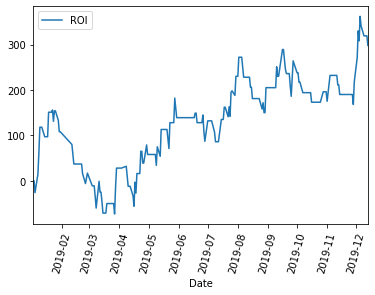

In [12]:
plot_roi(result_roi, te_result)

In [7]:
model_dense = build_model('dense' ,tr_x.shape, one_tr_y.shape)

''' Compile model with specified loss and optimizer '''
model_dense.compile(loss= 'categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

''' set the size of mini-batch and number of epochs'''
batch_size = 128
epochs = 300

'''Fit models and use validation_split=0.1 '''
history = model_dense.fit(tr_x, one_tr_y,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              shuffle=True,
                              validation_split=0.1,)

Train on 4010 samples, validate on 446 samples
Epoch 1/300
4010/4010 [==============================] - 1s 276us/step - loss: 1.3552 - accuracy: 0.4030 - val_loss: 1.5198 - val_accuracy: 0.3094
Epoch 2/300
4010/4010 [==============================] - 0s 91us/step - loss: 1.1011 - accuracy: 0.4793 - val_loss: 1.2749 - val_accuracy: 0.3498
Epoch 3/300
4010/4010 [==============================] - 0s 85us/step - loss: 1.0566 - accuracy: 0.4820 - val_loss: 1.1055 - val_accuracy: 0.4350
Epoch 4/300
4010/4010 [==============================] - 0s 84us/step - loss: 1.0345 - accuracy: 0.5007 - val_loss: 1.1276 - val_accuracy: 0.4664
Epoch 5/300
4010/4010 [==============================] - 0s 103us/step - loss: 1.0173 - accuracy: 0.5145 - val_loss: 1.0864 - val_accuracy: 0.4731
Epoch 6/300
4010/4010 [==============================] - 0s 83us/step - loss: 1.0113 - accuracy: 0.5172 - val_loss: 1.0703 - val_accuracy: 0.4731
Epoch 7/300
4010/4010 [==============================] - 0s 85us/step - los

4010/4010 [==============================] - 0s 97us/step - loss: 0.5791 - accuracy: 0.7589 - val_loss: 1.5492 - val_accuracy: 0.4126
Epoch 57/300
4010/4010 [==============================] - 0s 97us/step - loss: 0.5705 - accuracy: 0.7631 - val_loss: 1.4643 - val_accuracy: 0.4462
Epoch 58/300
4010/4010 [==============================] - 0s 82us/step - loss: 0.5557 - accuracy: 0.7678 - val_loss: 1.5474 - val_accuracy: 0.4283
Epoch 59/300
4010/4010 [==============================] - 0s 87us/step - loss: 0.5505 - accuracy: 0.7678 - val_loss: 1.5096 - val_accuracy: 0.4439
Epoch 60/300
4010/4010 [==============================] - 0s 95us/step - loss: 0.5296 - accuracy: 0.7788 - val_loss: 1.5238 - val_accuracy: 0.4417
Epoch 61/300
4010/4010 [==============================] - 0s 96us/step - loss: 0.5237 - accuracy: 0.7885 - val_loss: 1.5823 - val_accuracy: 0.4260
Epoch 62/300
4010/4010 [==============================] - 0s 85us/step - loss: 0.5123 - accuracy: 0.7860 - val_loss: 1.5770 - val_a

Epoch 112/300
4010/4010 [==============================] - 0s 88us/step - loss: 0.2139 - accuracy: 0.9167 - val_loss: 2.3567 - val_accuracy: 0.3834
Epoch 113/300
4010/4010 [==============================] - 0s 90us/step - loss: 0.2266 - accuracy: 0.9170 - val_loss: 2.3865 - val_accuracy: 0.4260
Epoch 114/300
4010/4010 [==============================] - 0s 87us/step - loss: 0.2212 - accuracy: 0.9140 - val_loss: 2.4347 - val_accuracy: 0.3924
Epoch 115/300
4010/4010 [==============================] - 0s 103us/step - loss: 0.2335 - accuracy: 0.9132 - val_loss: 2.3793 - val_accuracy: 0.4148
Epoch 116/300
4010/4010 [==============================] - 0s 98us/step - loss: 0.2373 - accuracy: 0.9090 - val_loss: 2.4392 - val_accuracy: 0.4170
Epoch 117/300
4010/4010 [==============================] - 0s 102us/step - loss: 0.2108 - accuracy: 0.9239 - val_loss: 2.4921 - val_accuracy: 0.4193
Epoch 118/300
4010/4010 [==============================] - 0s 91us/step - loss: 0.2317 - accuracy: 0.9152 - va

4010/4010 [==============================] - 0s 98us/step - loss: 0.1290 - accuracy: 0.9519 - val_loss: 2.8968 - val_accuracy: 0.3924
Epoch 168/300
4010/4010 [==============================] - 0s 109us/step - loss: 0.1220 - accuracy: 0.9561 - val_loss: 2.9409 - val_accuracy: 0.4081
Epoch 169/300
4010/4010 [==============================] - 0s 104us/step - loss: 0.1352 - accuracy: 0.9524 - val_loss: 3.0082 - val_accuracy: 0.3991
Epoch 170/300
4010/4010 [==============================] - 0s 94us/step - loss: 0.1253 - accuracy: 0.9549 - val_loss: 3.0183 - val_accuracy: 0.4148
Epoch 171/300
4010/4010 [==============================] - 0s 99us/step - loss: 0.1152 - accuracy: 0.9569 - val_loss: 3.0314 - val_accuracy: 0.4058
Epoch 172/300
4010/4010 [==============================] - 0s 104us/step - loss: 0.1101 - accuracy: 0.9594 - val_loss: 3.0513 - val_accuracy: 0.3991
Epoch 173/300
4010/4010 [==============================] - 0s 104us/step - loss: 0.1291 - accuracy: 0.9531 - val_loss: 2.98

4010/4010 [==============================] - 0s 102us/step - loss: 0.0951 - accuracy: 0.9681 - val_loss: 3.1023 - val_accuracy: 0.4013
Epoch 223/300
4010/4010 [==============================] - 0s 87us/step - loss: 0.1198 - accuracy: 0.9611 - val_loss: 3.1183 - val_accuracy: 0.3901
Epoch 224/300
4010/4010 [==============================] - 0s 92us/step - loss: 0.1131 - accuracy: 0.9561 - val_loss: 3.1639 - val_accuracy: 0.4036
Epoch 225/300
4010/4010 [==============================] - 0s 108us/step - loss: 0.1255 - accuracy: 0.9544 - val_loss: 3.2482 - val_accuracy: 0.4193
Epoch 226/300
4010/4010 [==============================] - 0s 91us/step - loss: 0.1244 - accuracy: 0.9514 - val_loss: 3.0953 - val_accuracy: 0.3946
Epoch 227/300
4010/4010 [==============================] - 0s 96us/step - loss: 0.1265 - accuracy: 0.9526 - val_loss: 3.0932 - val_accuracy: 0.3991
Epoch 228/300
4010/4010 [==============================] - 0s 108us/step - loss: 0.1092 - accuracy: 0.9586 - val_loss: 3.197

4010/4010 [==============================] - 0s 98us/step - loss: 0.0810 - accuracy: 0.9693 - val_loss: 3.2724 - val_accuracy: 0.4126
Epoch 278/300
4010/4010 [==============================] - 0s 94us/step - loss: 0.0834 - accuracy: 0.9701 - val_loss: 3.3255 - val_accuracy: 0.4013
Epoch 279/300
4010/4010 [==============================] - 0s 93us/step - loss: 0.0924 - accuracy: 0.9676 - val_loss: 3.2210 - val_accuracy: 0.4126
Epoch 280/300
4010/4010 [==============================] - 0s 104us/step - loss: 0.0823 - accuracy: 0.9663 - val_loss: 3.2115 - val_accuracy: 0.4036
Epoch 281/300
4010/4010 [==============================] - 0s 101us/step - loss: 0.0802 - accuracy: 0.9713 - val_loss: 3.1605 - val_accuracy: 0.4170
Epoch 282/300
4010/4010 [==============================] - 0s 92us/step - loss: 0.0908 - accuracy: 0.9656 - val_loss: 3.1918 - val_accuracy: 0.4305
Epoch 283/300
4010/4010 [==============================] - 0s 93us/step - loss: 0.0753 - accuracy: 0.9748 - val_loss: 3.1773

In [8]:
pred_y = model_dense.predict(te_x)
pred_z = categori_reverse(pred_y)
result_roi = score(pred_z, te_result)

2019-01-02,0,0,0,100000,00:00
2019-01-03,-1,53,53,110600,09:24:00
2019-01-04,1,-28,25,105000,09:18:00
2019-01-07,-1,41,66,113200,09:08:00
2019-01-08,0,0,66,113200,00:00
2019-01-09,0,0,66,113200,00:00
2019-01-10,1,-21,45,109000,08:48:00
2019-01-11,0,0,45,109000,00:00
2019-01-14,0,0,45,109000,00:00
2019-01-15,0,0,45,109000,00:00
2019-01-16,1,-23,22,104400,09:34:00
2019-01-17,0,0,22,104400,00:00
2019-01-18,0,0,22,104400,00:00
2019-01-21,-1,-23,-1,99800,09:41:00
2019-01-22,0,0,-1,99800,00:00
2019-01-23,0,0,-1,99800,00:00
2019-01-24,0,0,-1,99800,00:00
2019-01-25,1,43,42,108400,09:45:00
2019-01-28,0,0,42,108400,00:00
2019-01-29,0,0,42,108400,00:00
2019-01-30,0,0,42,108400,00:00
2019-02-11,0,0,42,108400,00:00
2019-02-12,1,-21,21,104200,09:03:00
2019-02-13,0,0,21,104200,00:00
2019-02-14,1,49,70,114000,09:14:00
2019-02-15,0,0,70,114000,00:00
2019-02-18,-1,-22,48,109600,09:31:00
2019-02-19,1,19,67,113400,13:29:00
2019-02-20,-1,-29,38,107600,09:01:00
2019-02-21,0,0,38,107600,00:00
2019-02-22,0,0,

#2action_day: 90, #3consecutive_loss_max: -214, #4consecutive_loss_days_max: 10, #5loss_days: 58, roi: -59, roi_max: 297, roi_min: -120


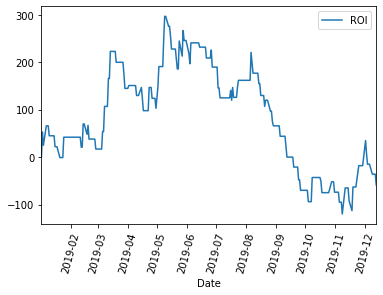

In [9]:
plot_roi(result_roi, te_result)

In [13]:
model_rnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3, 64)             27648     
_________________________________________________________________
lstm_2 (LSTM)                (None, 3, 64)             33024     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                

In [14]:
model_dense.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               66560     
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)              